<a href="https://colab.research.google.com/github/Athul64/Car-Price-Prediction-ML-/blob/main/Car_Price_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [3]:
# Importing necessary libraries
import numpy as np  # Used for numerical operations, including arrays and mathematical functions.
import pandas as pd  # A library for handling structured data using DataFrames.
import matplotlib.pyplot as plt  # A plotting library for creating visualizations.
import seaborn as sns  # A statistical visualization library based on Matplotlib.

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  # Splits dataset and performs hyperparameter tuning.
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Encoding and standardizing numerical features.
from sklearn.linear_model import LinearRegression  # A simple regression model from scikit-learn.
from sklearn.svm import SVR  # Support Vector Regressor for regression tasks.
from sklearn.tree import DecisionTreeRegressor  # Decision tree-based regression model.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ensemble methods combining multiple decision trees.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Metrics for evaluating regression models.

* **What it does:** Imports necessary libraries for data analysis, visualization, and machine learning, such as NumPy, Pandas, Matplotlib, Seaborn, and Scikit-learn modules.
* **Methods used:** `import` statements
* **Outcome:** All the tools you need for your analysis are readily available.

# **Reading and Exploring the Dataset**

In [4]:
# Reading the CSV dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# Display the first few rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


* **What it does**: Reads the car price dataset from a CSV file and displays the first few rows.
* **Methods used:** `pd.read_csv()`, `df.head()`
* **Outcome:** Dataset is loaded into a Pandas DataFrame (`df`) and provides a glimpse of its contents.
* **Output:** A table showing the first 5 rows of your dataset with columns like 'car_ID', 'CarName', 'fueltype', 'enginesize', 'price', and more.

# **Dataset Dimensions**

In [5]:
# Display the number of rows and columns
print("The Number of Rows :", df.shape[0])
print("The Number of Columns :", df.shape[1])

The Number of Rows : 205
The Number of Columns : 26


* **What it does:** Prints the number of rows and columns in the dataset.
* **Methods used:** `df.shape`, `print()`
* **Outcome:** You know the dataset size (205 rows, 26 columns).
* **Output:** Two lines of text indicating: "The Number of Rows: 205", "The Number of Columns: 26".

# **Checking Data Types and Missing Values**

In [6]:
# provides an overview of the DataFrame
df.info()

# Checking missing values in the dataset
missing_values = df.isnull().sum()
print(f'\nNumber of missing values in the dataset :',missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

* **What it does:** Examines data types of each column and checks for missing values.
* **Methods used:**`df.info()`, `df.isnull().sum()`
* **Outcome:** You see data types of each column and confirm the absence of missing values.
* **Output:** A summary table showing column names, data types (e.g., int64, float64, object), non-null values count (205 for all), and memory usage. This would be followed by an empty output from `print(missing_values[missing_values > 0])` indicating no missing values.

# **Summary Statistics**

In [7]:
# statistics that summarize of the dataset
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


* **What it does:** Calculates descriptive statistics for numerical columns.
* **Methods used:** `df.describe()`
* **Outcome:** Statistical summary of your numerical data is generated (count, mean, std, min, quartiles, max).
* **Output:** A table showing descriptive statistics for numerical features like 'wheelbase', 'carlength', 'enginesize', 'horsepower', 'price', etc.

# **Handling Duplicates**



In [8]:
# Checking for duplicated values
print(f'Number Duplicated Entry Present in the Dataset Before Drop :',df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(f'Number Duplicated Entry Present in the Dataset After Drop :',df.duplicated().sum())

Number Duplicated Entry Present in the Dataset Before Drop : 0
Number Duplicated Entry Present in the Dataset After Drop : 0


* **What it does:** Checks for and removes any duplicate rows in the dataset.
* **Methods used:** `df.duplicated()`, `df.drop_duplicates()`
* **Outcome:** Ensures dataset is clean of duplicates.
* **Output:** Two lines of text confirming "Number Duplicated Entry Present in the Dataset Before Drop: 0", "Number Duplicated Entry Present in the Dataset After Drop: 0". This indicates no duplicates were found.

# **Data Cleaning**

In [9]:
# Drop the 'car_ID' column
df.drop(columns=['car_ID'], inplace=True)

# Extract car brand from 'CarName'
df['CarBrand'] = df['CarName'].apply(lambda x: x.split()[0].lower())

# Drop the original 'CarName' column as it's no longer needed
df.drop(columns=['CarName'], inplace=True)

# Display the first few rows
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


* **What it does:** Drops unnecessary columns ('car_ID', 'CarName') and extracts car brand information into a new 'CarBrand' column.
* **Methods used:** `df.drop()`, string manipulation with `apply()` and `lambda` function
* **Outcome:** Dataset is cleaned and features are preprocessed.
* **Output:** A table displaying the first 5 rows of the modified dataset with the new 'CarBrand' column and the removed 'car_ID' and 'CarName' columns.

# **Detecting Outliers**

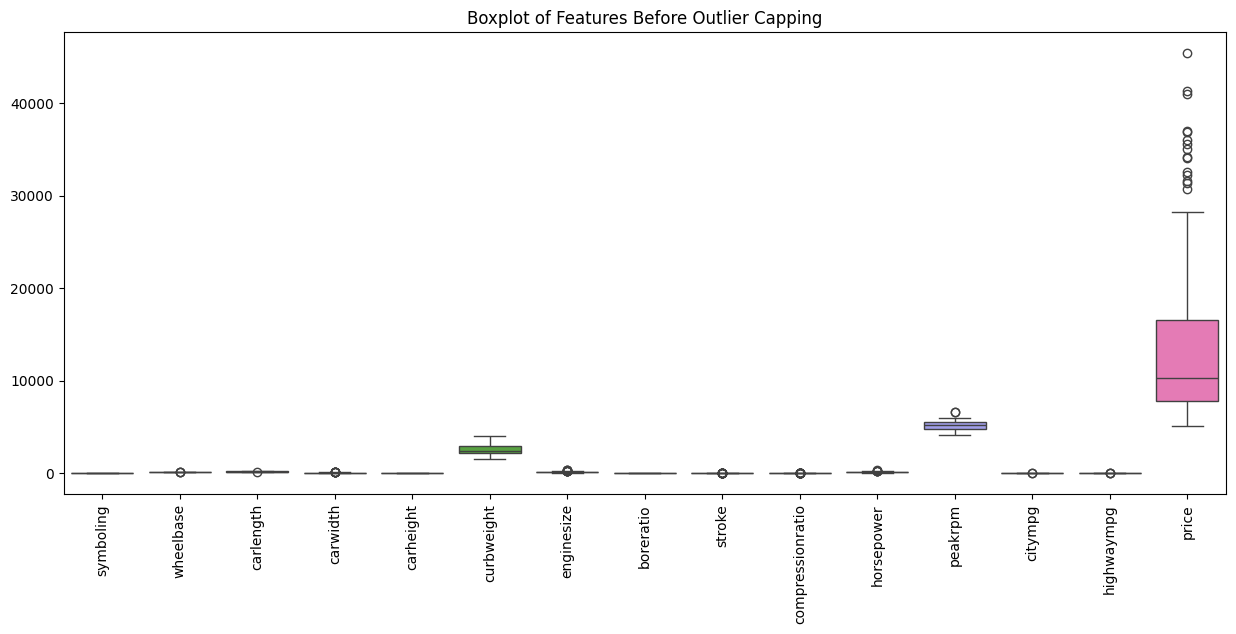

In [10]:
# Plot boxplots for Detect Before Applying Capping Method to the Outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.iloc[:, :24])
plt.xticks(rotation=90)
plt.title("Boxplot of Features Before Outlier Capping")
plt.show()

* **What it does:** Visualizes potential outliers in the data using box plots.
* **Methods used:** `sns.boxplot()`, `plt.show()`
Outcome: Helps you identify outliers in different features.
* **Output:** Box plots for each numerical feature. Outliers appear as individual points beyond the whiskers of the box plots.

# **Handling Outliers**

In [11]:
df_cleaned = df.copy()  # Make a copy to avoid modifying the original data

# Creating a function to checking and capping the outliers in the dataset
def cap_outliers(df_cleaned, columns):
  for col in columns:
    if col in df_cleaned.columns:  # Ensure the column exists
      Q1,Q3 = df_cleaned[col].quantile([0.25,0.75])
      IQR = Q3 - Q1

      # Define Capping Limit
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      # Applying Capping Using .clip()
      df_cleaned[col] = df_cleaned[col].clip(lower_bound,upper_bound)


  return df_cleaned


# Define columns to cap
cap_cols = ['wheelbase', 'carlength', 'carwidth', 'enginesize', 'stroke',
            'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']

# Apply the function and store the modified DataFrame
df_cleaned = cap_outliers(df_cleaned, cap_cols)

* **What it does:** Caps outliers using the Interquartile Range (`IQR`) method.
* **Methods used:** Custom function `cap_outliers()`, `df.quantile()`, `clip()`
* **Outcome:** Outliers are capped, reducing their influence on models.

# **Visualizing Outlier Handling**

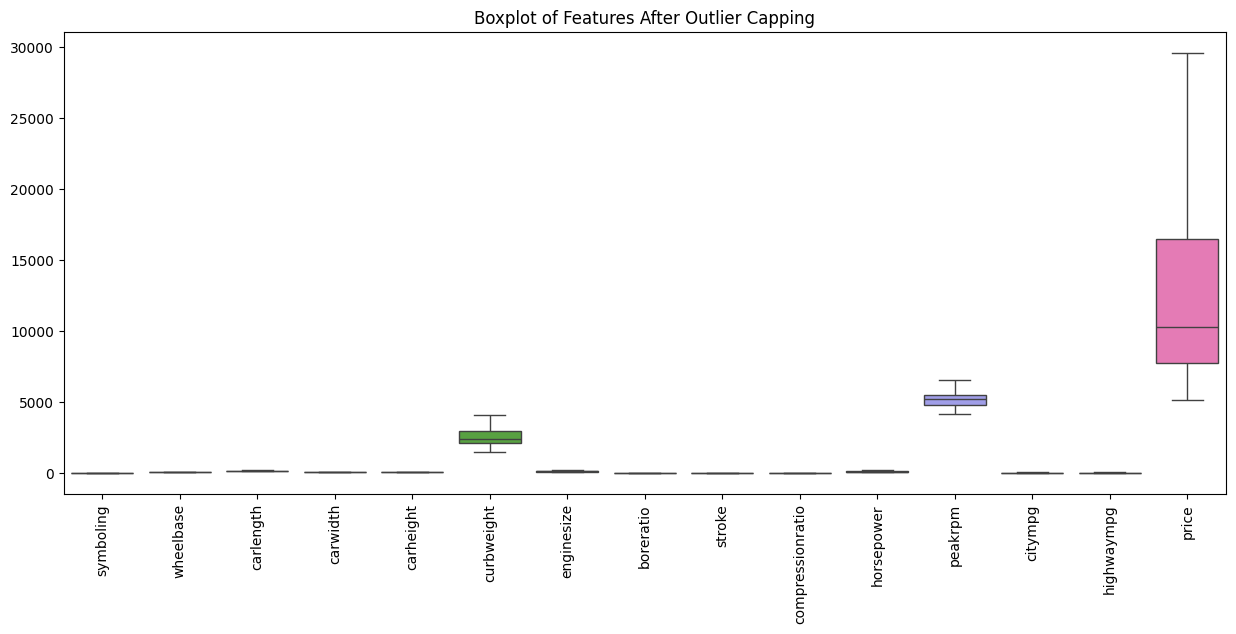

In [12]:
# Plot boxplots for After Applying Capping Method to the Outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_cleaned.iloc[:, :24])
plt.xticks(rotation=90)
plt.title("Boxplot of Features After Outlier Capping")
plt.show()

* **What it does:** Shows box plots after outlier capping for comparison.
* **Methods used:** `sns.boxplot()`, `plt.show()`
* **Outcome:** Visual representation of how capping has affected the data.
* **Output:** Box plots for each numerical feature after capping. Notice how the outliers are now within or closer to the whiskers of the boxes.

# **Skewness Before and After Outlier Capping**

In [13]:
# Skewness before outlier capping
print("Skewness Before Outlier Capping:")
print(df.select_dtypes(include=['float64','int64']).skew())

# Skewness after outlier capping
print("\nSkewness After Outlier Capping:")
print(df_cleaned.select_dtypes(include=['float64','int64']).skew())

Skewness Before Outlier Capping:
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

Skewness After Outlier Capping:
symboling           0.211072
wheelbase           0.924916
carlength           0.155954
carwidth            0.776278
carheight           0.063123
curbweight          0.681398
enginesize          0.908453
boreratio           0.020156
stroke             -0.379130
compressionratio    0.035149
horsepower          0.814957
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               1.222031
dtype: float64


* **What it does:** Calculates and prints the skewness of numerical features before and after outlier capping.
* **Methods used**: `df.skew()`, `print()`
* **Outcome:** Shows how outlier capping has affected the skewness.
* **Output:** Two tables showing the skewness values of each numerical feature before and after capping. This helps understand the impact of outlier capping on data distribution.

# **Applying Log & Square Root Transformation**

In [14]:
# Select numerical columns and calculate skewness
skewness = df_cleaned.select_dtypes(include=['float64', 'int64']).skew()

# Apply transformations based on skewness
for col in skewness.index:
    if skewness[col] > 0.5:
        df_cleaned[col] = np.log1p(df_cleaned[col])  # Log transformation for positive skew
    elif skewness[col] < -0.5:
        df_cleaned[col] = np.square(df_cleaned[col])  # Squaring for negative skew

# Skewness after outlier capping
print("\nSkewness After Applying Log & Sqrt :")
print(df_cleaned.select_dtypes(include=['float64','int64']).skew())


Skewness After Applying Log & Sqrt :
symboling           0.211072
wheelbase           0.783401
carlength           0.155954
carwidth            0.697486
carheight           0.063123
curbweight          0.270250
enginesize          0.406030
boreratio           0.020156
stroke             -0.379130
compressionratio    0.035149
horsepower          0.292619
peakrpm             0.049935
citympg             0.004715
highwaympg          0.347441
price               0.459316
dtype: float64


**What it does:** Applies transformations (log or square root) to reduce skewness.
**Methods used:** `np.log1p()`, `np.square()`
**Outcome:** Makes data distributions closer to normal.

# **Final Distributions After Transformation**




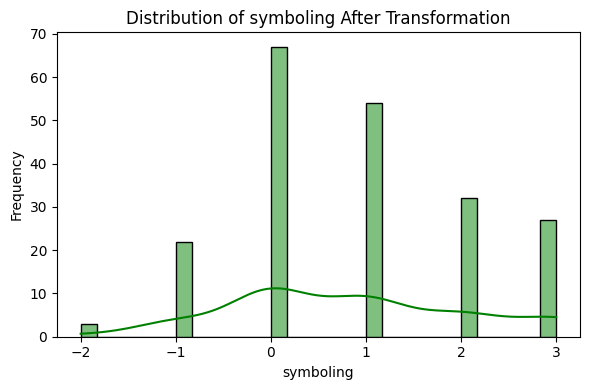

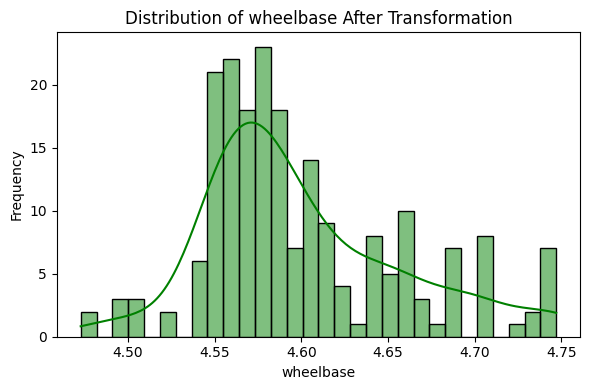

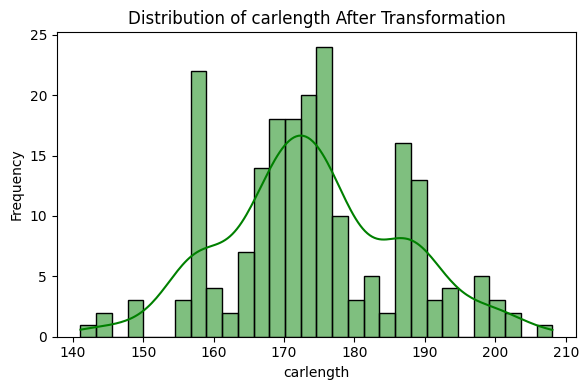

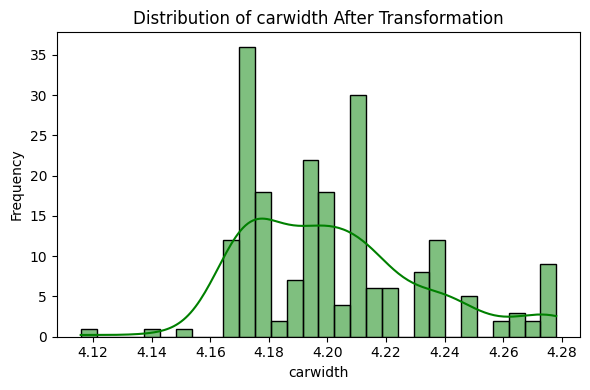

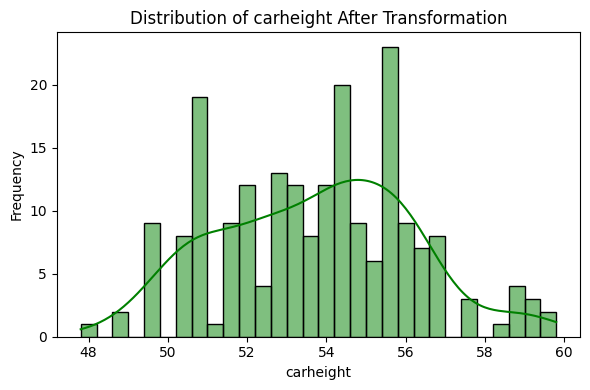

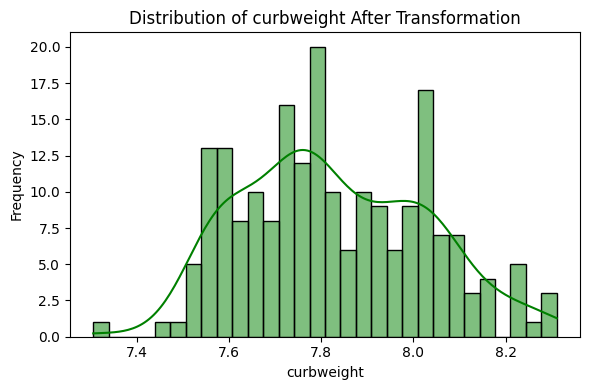

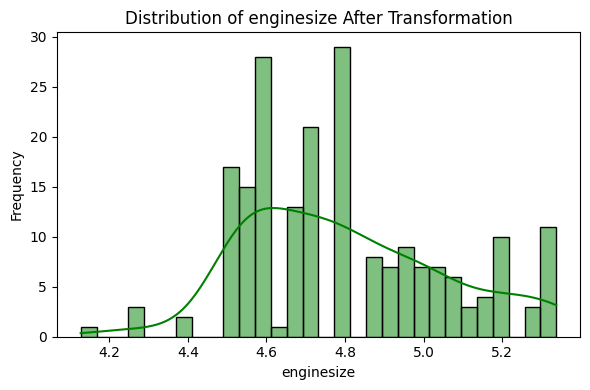

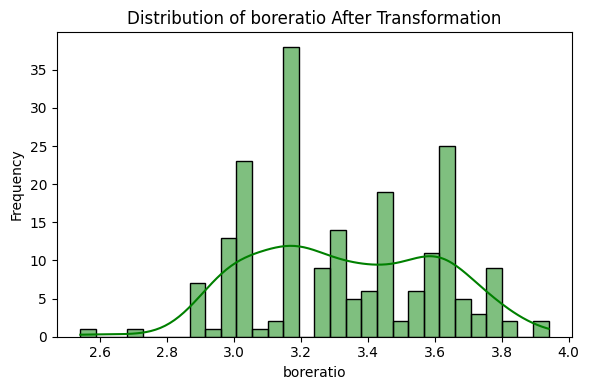

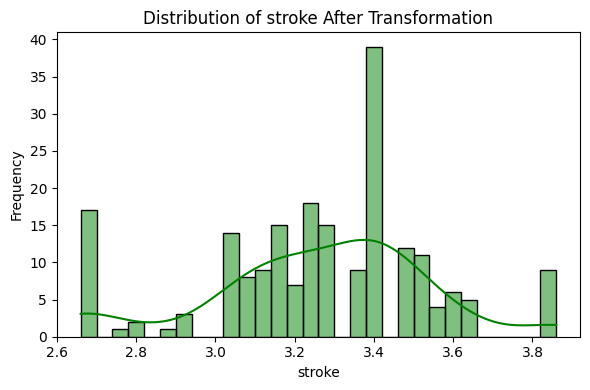

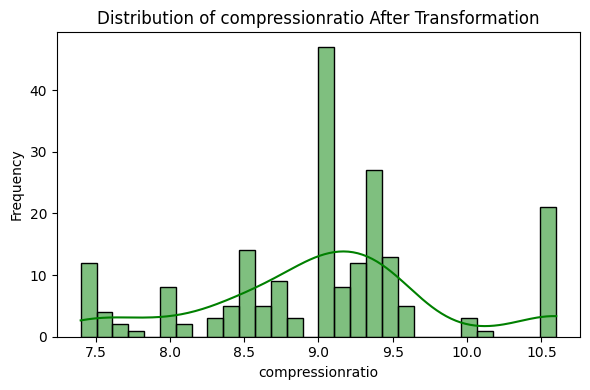

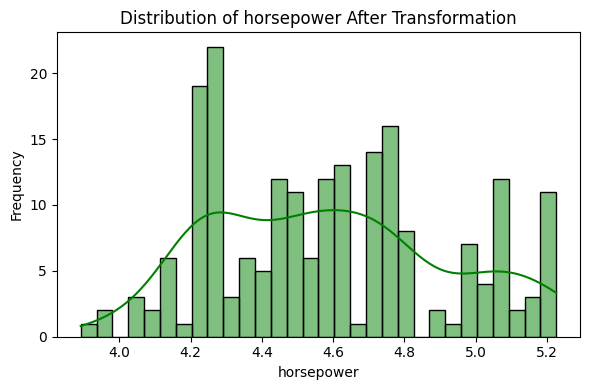

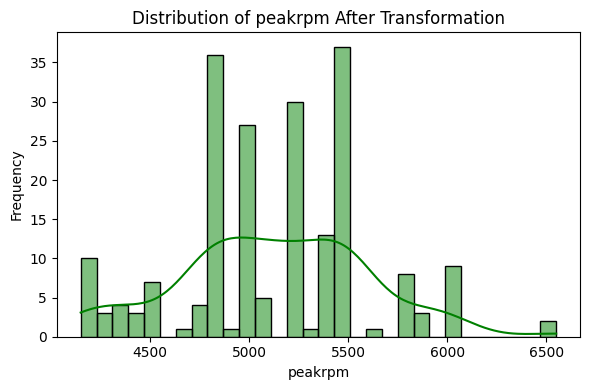

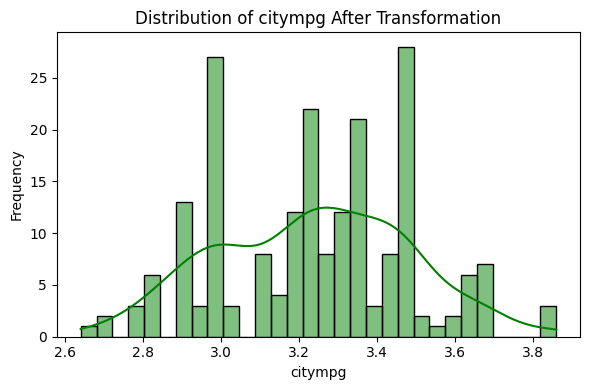

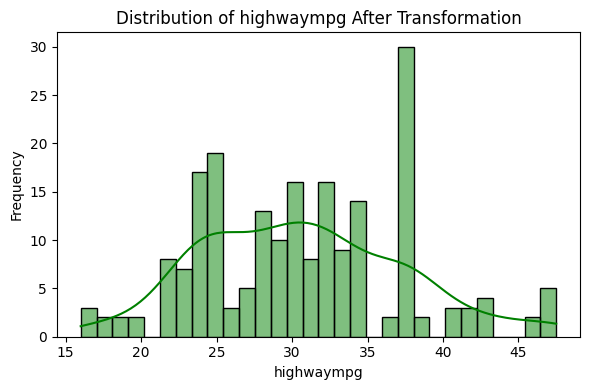

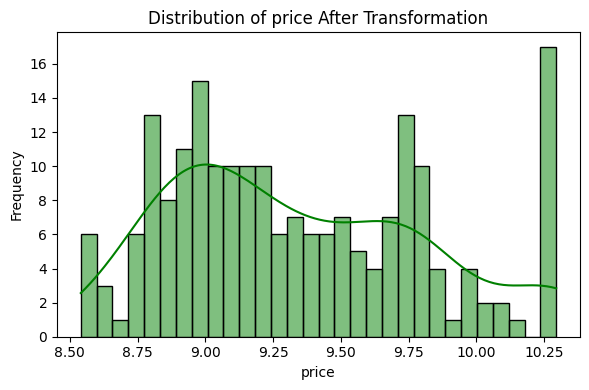

In [15]:
# Plot distributions after transformation
for col in skewness.index:  # Use .index to get column names
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[col], bins=30, kde=True, color='green')

    plt.title(f"Distribution of {col} After Transformation")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

* **What it does:** Visualizes the distribution of transformed features using histograms.
* **Methods used:** `sns.histplot()`,`plt.show()`
* **Outcome:** Confirms the effectiveness of transformations in achieving normality.
* **Output:** A series of histograms, one for each transformed numerical feature. These histograms show the final distributions and provide insights into their shape.

# **Encoding Categorical Variables**

In [16]:
# Select all Categorical Columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Convert categorical columns using One-Hot Encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols)

# Convert all boolean values to integers (0 and 1)
df_encoded = df_encoded.astype(float)  # Keep numeric precision

# Display first 5 rows after encoding
df_encoded.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_toyouta,CarBrand_vokswagen,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,3.0,4.495355,168.8,4.175925,48.8,7.843456,4.875197,3.47,2.68,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,4.495355,168.8,4.175925,48.8,7.843456,4.875197,3.47,2.68,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,4.559126,171.2,4.197202,52.4,7.945910,5.030438,2.68,3.47,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,4.613138,176.6,4.207673,54.3,7.757051,4.700480,3.19,3.40,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,4.609162,176.6,4.210645,54.3,7.946264,4.919981,3.19,3.40,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* **What it does:** Converts categorical features into numerical representations using One-Hot Encoding.
* **Methods used:** `pd.get_dummies()`
* **Outcome:** Prepares data for machine learning models.
* **Output:** A table displaying the first 5 rows of the encoded dataset with new columns created for each category of the categorical features. These new columns have values of 0 or 1, representing the presence or absence of each category.

# **Feature Scaling & Splitting the Dataset**

In [17]:
# Save feature names before scaling
feature_names = df_encoded.drop(columns=['price']).columns

# Splitting feature and target
X = df_encoded.drop(columns=['price'], axis=1) # Independent variable
y = df_encoded['price'] # Dependent variable

# Feature Scaling
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (164, 79)
Shape of X_test: (41, 79)
Shape of y_train: (164,)
Shape of y_test: (41,)


* **What it does:** Scales numerical features and splits data into training and testing sets.
* **Methods used:** `StandardScaler()`, `train_test_split()`
* **Outcome:** Data is ready for model training and evaluation.
* **Output:** Four lines of text indicating the shapes of the resulting training and testing sets (X_train, X_test, y_train, y_test). This shows how the data is split for model training and evaluation.Splits the dataset into 80% training and 20% testing.

# **Training Machine Learning Models**

In [18]:
# Initialize Models
Models = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(random_state=42),
    'Random Forest' : RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting' : GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor' : SVR()
}

# Train and evaluate  models
results = [] # Empty list to store results


# Train and evaluate models
for name,model in Models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

    # Calculate performance metrics
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)


  results.append({
      'Model' : name,
      'R²_Score' : r2,
      'Mean Squared Error' : mse,
      'Root Mean Squared Error': rmse,  # Added RMSE
      'Mean Absolute Error' : mae
  })


# Convert results to DataFrame
results_df = pd.DataFrame(results)
# Print Results DataFrame
results_df

,Model,R²_Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
0,Linear Regression,0.898296,0.023751,0.154114,0.112733
1,Decision Tree,0.936849,0.014748,0.121440,0.089498
2,Random Forest,0.945475,0.012733,0.112842,0.089566
3,Gradient Boosting,0.943165,0.013273,0.115208,0.096401
4,Support Vector Regressor,0.745147,0.059516,0.243960,0.157060


* **What it does:** Trains multiple regression models and evaluates their performance.
* **Methods used:** Several regression models
1. `Linear Regression`
2. `Decision Tree`
3. `Random Forest`  
4. `Gradient Boosting`
5. `Support Vector Regressor`

* performance metrics:
1. `R²_Score`
2. `Mean Squared Error`
3. `Root Mean Squared Error`
4. `Mean Absolute Error`

* **Output:** A table displaying the performance metrics (R², MSE, RMSE, MAE) for each trained model. This allows you to compare the models and identify the one with the best performance, which is often the model with the highest R² score and the lowest error metrics.

* Best model: `Random Forest` `(R² = 0.945)`
* Worst model: `SVR` `(R² = 0.745)`

# **Sorting Model Performance**

In [19]:
# Sorting values in the descending format
sorted_results = results_df.sort_values(by="R²_Score", ascending=False)
sorted_results

,Model,R²_Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
2,Random Forest,0.945475,0.012733,0.112842,0.089566
3,Gradient Boosting,0.943165,0.013273,0.115208,0.096401
1,Decision Tree,0.936849,0.014748,0.121440,0.089498
0,Linear Regression,0.898296,0.023751,0.154114,0.112733
4,Support Vector Regressor,0.745147,0.059516,0.243960,0.157060


* **What it does:** Sorts model performance results in descending order of R² score.
* **Methods used:** `results_df.sort_values()`
* **Outcome:** Provides a ranked list of models based on their performance.
* **Output:** A table similar to the previous one but with the models sorted in descending order based on their R² scores. This makes it easy to identify the best-performing model.

# **Feature Importance Analysis**

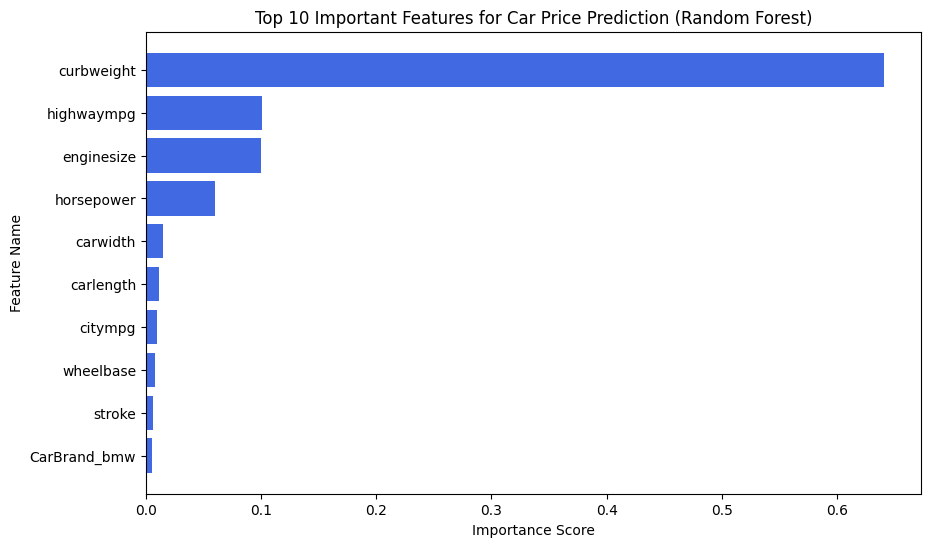

In [20]:
# Feature Importance Analysis using Random Forest
best_model = Models["Random Forest"]
feature_importance_df = pd.DataFrame({"Feature": feature_names,
                                      "Importance": best_model.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False).head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color='royalblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 10 Important Features for Car Price Prediction (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

* **What it does:** Analyzes feature importance for the best model (Random Forest, in this case).
* **Methods used:** `feature_importances_` attribute of the Random Forest model, bar plot
* **Outcome:** Identifies the most influential features in predicting car prices.
* **Output:** A bar plot showing the top 10 most important features and their importance scores. This provides insights into which features contribute most to the car price prediction.

# **Hyperparameter Tuning With GridSearchCV**

In [21]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)


y_pred_optimized = best_model.predict(X_test)
optimized_r2 = r2_score(y_test, y_pred_optimized)
optimized_mse = mean_squared_error(y_test, y_pred_optimized)
optimized_mae = mean_absolute_error(y_test, y_pred_optimized)

print("Best Parameters:", best_params)
print("Optimized R²:", optimized_r2)
print("Optimized MSE:", optimized_mse)
print("Optimized MAE:", optimized_mae)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Optimized R²: 0.9449557534565503
Optimized MSE: 0.012854574099833677
Optimized MAE: 0.09014439337400643


* **What it does:** Improves the Random Forest model by tuning its hyperparameters using GridSearchCV.
* **Methods used:** `GridSearchCV`, cross-validation, performance metrics
* **Outcome:** Optimizes model performance by finding the best hyperparameter settings.
* **Output:** It prints the best hyperparameter values found by GridSearchCV and the corresponding optimized performance metrics (R², MSE, MAE) of the tuned Random Forest model.

# **Hyperparameter Tuning with RandomizedSearchCV (Faster)**






In [22]:
# Define hyperparameter distribution for RandomizedSearchCV
param_dist = {
    "n_estimators": np.arange(100, 500, 50),
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Number of iterations
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters
best_params_random = random_search.best_params_

# Train optimized model with best parameters
best_model_random = RandomForestRegressor(**best_params_random, random_state=42)
best_model_random.fit(X_train, y_train)

# Predict and evaluate
y_pred_random = best_model_random.predict(X_test)
optimized_r2_random = r2_score(y_test, y_pred_random)
optimized_mse_random = mean_squared_error(y_test, y_pred_random)
optimized_mae_random = mean_absolute_error(y_test, y_pred_random)

# Display results
print("Best Parameters:", best_params_random)
print("Optimized R²:", optimized_r2_random)
print("Optimized MSE:", optimized_mse_random)
print("Optimized MAE:", optimized_mae_random)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Optimized R²: 0.946483962739375
Optimized MSE: 0.012497688853877639
Optimized MAE: 0.08865706602052141


* **What it does:** Performs hyperparameter tuning using RandomizedSearchCV, a faster alternative to GridSearchCV.
* **Methods used:** `RandomizedSearchCV`, random sampling of hyperparameters, performance metrics
* **Outcome:** Further optimizes model performance, potentially exceeding GridSearchCV results.
* **Output:** Similar to GridSearchCV, it prints the best hyperparameter values and performance metrics achieved using RandomizedSearchCV. In this case, the output highlights that RandomizedSearchCV achieved better performance.

# **Storing Model Performance in a DataFrame**

In [23]:
# Define the dictionary with R² Score
Comparison_R2_Scores = {
    'Model' : ['Random Forest','GridSearchCV Optimized','RandomizedSearchCV Optimized'],
    'R² Score' : [0.9455, 0.9449, 0.9464]
}

# Convert Comparison_R2_Scores to DataFrame
Comparison_R2_Scores_df = pd.DataFrame.from_dict(Comparison_R2_Scores)

# Display DataFrame
Comparison_R2_Scores_df.sort_values(by="R² Score", ascending=False)

,Model,R² Score
2,RandomizedSearchCV Optimized,0.9464
0,Random Forest,0.9455
1,GridSearchCV Optimized,0.9449


* **What it does:**Creates a DataFrame to store and compare the R² scores of different models.
* **Methods used:** Dictionary to DataFrame conversion using `pd.DataFrame.from_dict()`, sorting
* **Outcome:** Provides a concise way to compare and analyze model performance visually.
* **Output:** A table displaying the R² scores for the original Random Forest model, and the models optimized with GridSearchCV and RandomizedSearchCV. This table provides a direct comparison of their performance based on R² score.


# **Bar Chart: Comparison of R² Scores**

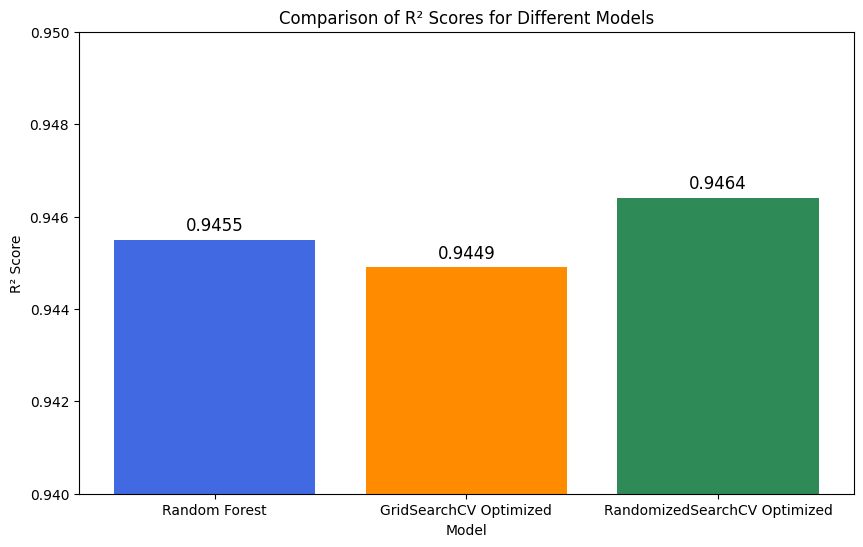

In [24]:
# Plot the R² Score comparison
plt.figure(figsize=(10, 6))
plt.bar(Comparison_R2_Scores_df["Model"], Comparison_R2_Scores_df["R² Score"], color=['royalblue', 'darkorange', 'seagreen'])

# Add labels and title
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Comparison of R² Scores for Different Models")
plt.ylim(0.94, 0.95)  # Set limits to highlight small differences

# Show value labels on bars
for index, value in enumerate(Comparison_R2_Scores_df["R² Score"]):
    plt.text(index, value + 0.0002, str(round(value, 4)), ha='center', fontsize=12)

plt.show()

* **What it does:** This chart visually compares the R² scores of the original Random Forest model and the models optimized with GridSearchCV and RandomizedSearchCV.
* **Methods used:**It uses `matplotlib.pyplot` to create a bar chart, where each bar represents a model, and its height represents the R² score.
* **Outcome:** Provides a clear visual comparison of model performance based on the R² score.
* **Output:** A bar chart with three bars labeled "Random Forest", "GridSearchCV Optimized", and "RandomizedSearchCV Optimized". The bar heights correspond to their respective R² scores, showing that RandomizedSearchCV Optimized model has the highest R² score. It allows for quick and intuitive understanding of the relative performance of each model version.

# **Final Conclusion**

Based on the entire code and its outputs, here's a summary of the findings and conclusions:

1. **Data Preparation:** The initial dataset was loaded, cleaned (handling missing values, duplicates), and preprocessed (outlier handling, feature scaling, encoding). This thorough data preparation ensured a reliable foundation for model training.

2. **Model Selection:** Various regression models were trained and evaluated, with Random Forest emerging as the top performer based on the initial R² score and other metrics.

3. **Hyperparameter Tuning:** The performance of the Random Forest model was further improved using hyperparameter tuning techniques (GridSearchCV and RandomizedSearchCV). RandomizedSearchCV achieved a slightly better R² score compared to GridSearchCV and the original model.

4. **Feature Importance:** Analysis revealed the most influential features affecting car prices, providing valuable insights for understanding price drivers.

5. **Final Model:** The Random Forest model optimized with RandomizedSearchCV demonstrated the best performance, indicating its suitability for predicting car prices with a high degree of accuracy.

**Overall Conclusion:**

The project successfully built a predictive model for car prices using machine learning techniques. Careful data preparation and model optimization led to a robust Random Forest model. Insights gained from feature importance analysis can further guide pricing strategies and car feature prioritization. The final model, with its high R² score, provides a reliable tool for predicting car prices and offers value to potential users in the automotive industry and beyond.